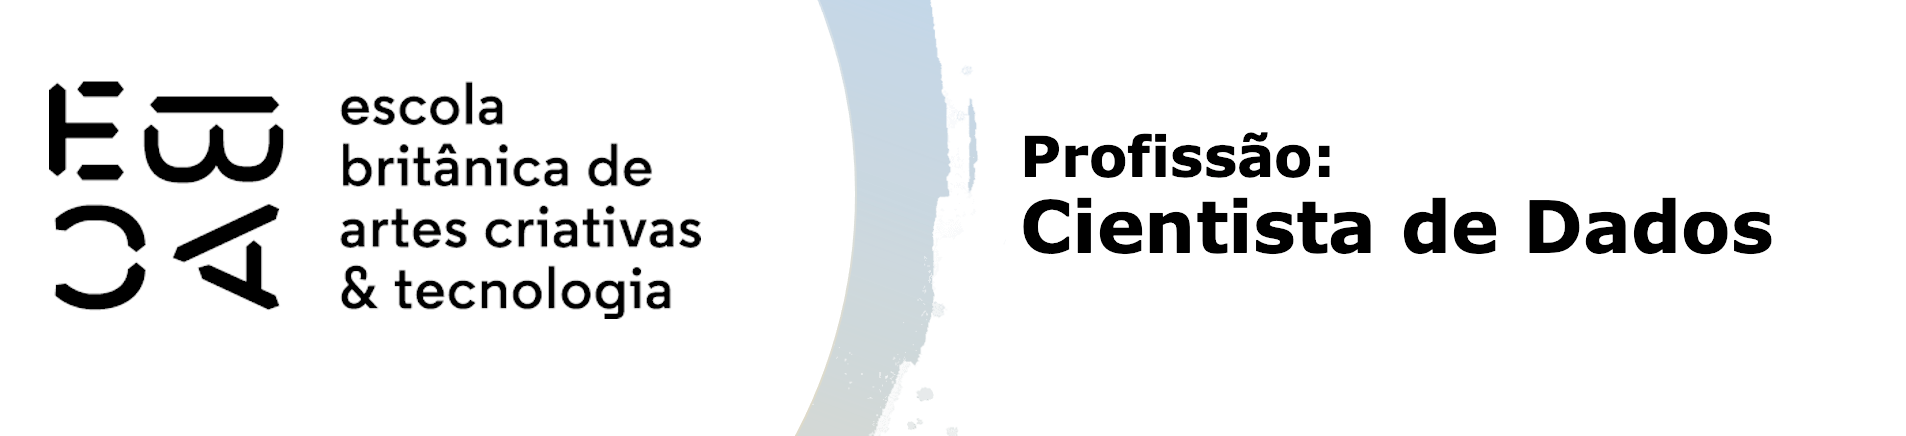

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

In [7]:
peng = sns.load_dataset('penguins')

In [9]:
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [11]:
features = [
    'bill_length_mm',
    'bill_depth_mm',
    'flipper_length_mm',
    'body_mass_g'
]

peng_num = peng[features]

In [13]:
peng_num = peng_num.dropna()

In [15]:
scaler = StandardScaler()
peng_scaled = scaler.fit_transform(peng_num)

In [17]:
agg = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward'
)

clusters = agg.fit_predict(peng_scaled)

In [19]:
peng_clustered = peng_num.copy()
peng_clustered['cluster'] = clusters

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

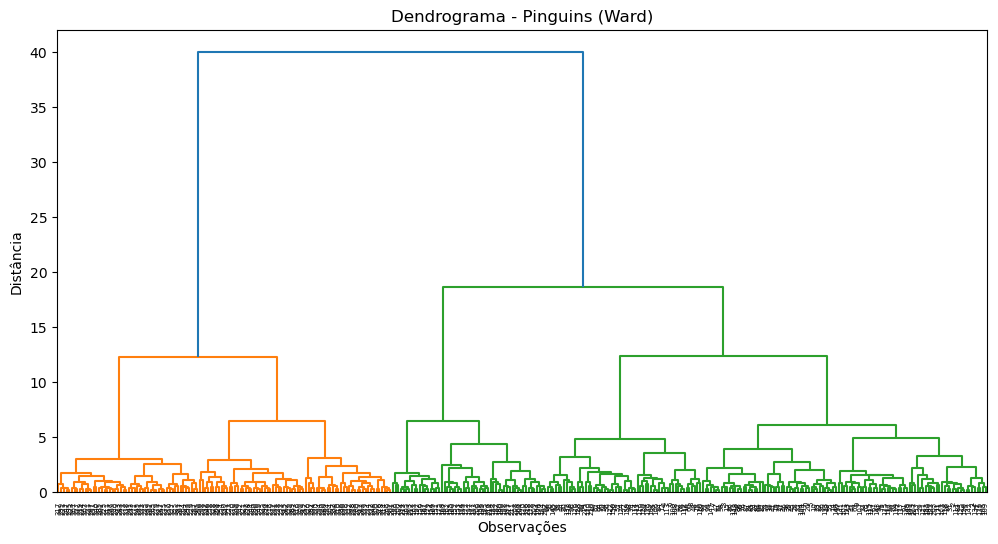

In [23]:
Z = linkage(peng_scaled, method='ward')

plt.figure(figsize=(12,6))
dendrogram(Z)
plt.title('Dendrograma - Pinguins (Ward)')
plt.xlabel('Observações')
plt.ylabel('Distância')
plt.show()

In [25]:
AgglomerativeClustering(n_clusters=3, linkage='ward')

AgglomerativeClustering(n_clusters=3)

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [33]:
peng_num = peng[features].dropna()

In [36]:
peng_clean = peng.loc[peng_num.index].copy()


In [38]:
peng_clean['cluster'] = clusters

In [40]:
len(peng_clean), len(clusters)

(342, 342)

In [42]:
pd.crosstab(peng_clean['cluster'], peng_clean['species'])

species,Adelie,Chinstrap,Gentoo
cluster,,,
0,151,11,0
1,0,0,123
2,0,57,0


A análise da distribuição das espécies por cluster evidencia que o método hierárquico aglomerativo foi altamente eficaz. O Cluster 1 é composto exclusivamente por pinguins da espécie Gentoo, enquanto o Cluster 2 contém apenas indivíduos da espécie Chinstrap. O Cluster 0 é majoritariamente formado por pinguins Adelie, apresentando pequena sobreposição com Chinstrap, o que indica similaridade morfológica entre essas espécies em alguns casos. Esses resultados demonstram que as variáveis quantitativas utilizadas são suficientes para discriminar de forma robusta as espécies de pinguins.

----

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [46]:
agg_4 = AgglomerativeClustering(
    n_clusters=4,
    linkage='ward'
)

clusters_4 = agg_4.fit_predict(peng_scaled)

In [48]:
peng_4 = peng.loc[peng_num.index].copy()
peng_4['cluster_4'] = clusters_4

In [50]:
pd.crosstab(peng_4['cluster_4'], peng_4['species'])

species,Adelie,Chinstrap,Gentoo
cluster_4,,,
0,0,0,123
1,97,8,0
2,0,57,0
3,54,3,0


In [52]:
pd.crosstab(
    [peng_4['cluster_4'], peng_4['species']],
    peng_4['sex']
)

sex                  Female  Male
cluster_4 species                
0         Gentoo         58    61
1         Adelie         72    21
          Chinstrap       8     0
2         Chinstrap      23    34
3         Adelie          1    52
          Chinstrap       3     0

In [54]:
pd.crosstab(peng_4['cluster_4'], peng_4['sex'])

sex,Female,Male
cluster_4,,
0,58,61
1,80,21
2,23,34
3,4,52


A análise do agrupamento hierárquico com quatro clusters revelou padrões naturais relevantes nos dados. As espécies Gentoo e Chinstrap permaneceram bem separadas, indicando forte distinção morfológica entre elas. Além disso, a espécie Adelie foi dividida em dois clusters distintos, fortemente associados ao sexo dos indivíduos. Um dos grupos é majoritariamente composto por fêmeas, enquanto o outro apresenta predominância quase total de machos, sugerindo a captura de um padrão de dimorfismo sexual. Esses resultados demonstram que o método hierárquico foi capaz de identificar tanto diferenças entre espécies quanto variações intraespecíficas biologicamente significativas

---
obs:
--

3 clusters → ótimo para identificar espécies
--
4 clusters → melhor para explorar estrutura interna dos dados 
--

-----

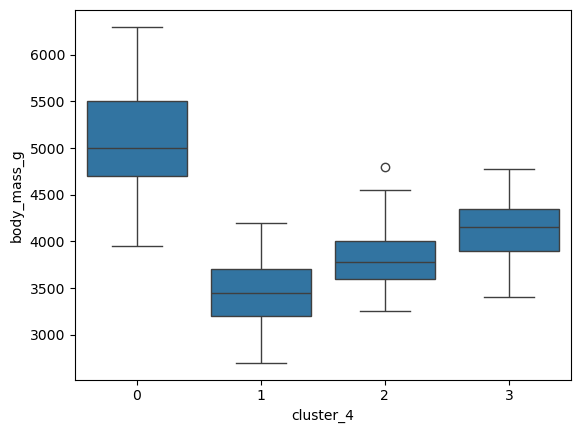

In [58]:
sns.boxplot(data=peng_4, x='cluster_4', y='body_mass_g')
plt.show()